# Clustering - Mini-Project 3

***Edit this cell with your name(s), tutorial number and ID(s)***

---

Name:Hassan Eltayeb

ID:58-16514

Tutorial:2

---

Name:Valerie Antonious

ID:59-30018

Tutorial:2

---


## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 160.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/music_genres.csv')
df.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
4,abstract,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1


Data inspection

In [6]:
# DATA INSPECTION

# 1. Display the first 5 rows of the dataset
#    This helps us verify the dataset loaded correctly and shows the structure of the data.
df.head()


,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
4,abstract,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1


This shows the first few rows so we can confirm the dataset loaded correctly. Most columns look clean and already numeric, duration_ms might need converting to seconds to make it easier to work with.

In [7]:
# Inspect dataset information
#    info() shows data types, non-null counts, and memory usage.
#    This helps detect missing values and incorrect data types early.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            2972 non-null   object 
 1   acousticness      2972 non-null   float64
 2   danceability      2972 non-null   float64
 3   duration_ms       2972 non-null   float64
 4   energy            2972 non-null   float64
 5   instrumentalness  2972 non-null   float64
 6   liveness          2972 non-null   float64
 7   loudness          2972 non-null   float64
 8   speechiness       2972 non-null   float64
 9   tempo             2972 non-null   float64
 10  valence           2972 non-null   float64
 11  popularity        2972 non-null   float64
 12  key               2972 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 302.0+ KB


This displays each column’s data type and missing values. All columns have 0 missing entries, and most features are already numeric. Only the genres column is an object type, so it may need encoding before modeling.

In [8]:
# List the unique values of categorical columns
#    This is useful for detecting typos, inconsistent categories, or unexpected values.
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())



Column: genres
['21st century classical' '432hz' '8-bit' ... 'zouk' 'zurich indie'
 'zydeco']


This lists the unique values in the categorical column. The genres column contains many different genre labels, and they all appear to be valid music categories with no obvious typos or strange formatting. Everything looks consistent

In [9]:
# Statistical summary for ALL columns (numeric + categorical)
# include='all' makes describe() include object/categorical columns
df.describe(include='all')

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2972,2972.000000,2972.000000,2.972000e+03,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000
unique,2972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,zydeco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.401157,0.537190,2.517272e+05,0.561190,0.211368,0.192791,-10.509249,0.083580,119.020796,0.492741,39.925598,5.938425
std,NaN,0.319781,0.150693,9.467215e+04,0.234511,0.267374,0.092370,5.370006,0.080495,17.471762,0.201853,16.747890,3.368621
min,NaN,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,NaN,0.119036,0.441169,2.063674e+05,0.395030,0.004829,0.137682,-12.428814,0.044900,109.191107,0.348558,32.531911,3.000000
50%,NaN,0.321706,0.546511,2.375479e+05,0.601264,0.080663,0.178752,-9.219409,0.059432,119.199333,0.499936,43.059365,7.000000
75%,NaN,0.674088,0.647536,2.773008e+05,0.730202,0.343333,0.220858,-6.919969,0.091000,127.510813,0.640380,51.139881,9.000000


This summary shows the distribution of each column. The genres column has 2972 unique values, which makes sense because each track has its own genre label. This summary helps us identify potential outliers in the dataset. duration_ms has a few extremely long tracks far above the 75th percentile, loudness includes some very quiet tracks, and tempo has a few unusually fast tracks. These outliers could distort clustering, so they may need to be capped or transformed before applying K-Means.

In [10]:
# Check how many missing values each column has
df.isnull().sum()

,0
genres,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
liveness,0
loudness,0
speechiness,0
tempo,0


This shows that their are no missing values withen the data

Data cleaning

In [11]:
df['duration_sec'] = df['duration_ms'] / 1000

The duration_ms values are very large, making them hard to interpret. Converting to seconds creates a new column duration_sec that is easier to analyze and compare.

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns to normalize
numeric_cols = ['acousticness', 'danceability', 'duration_sec', 'energy',
                'instrumentalness', 'liveness', 'loudness', 'speechiness',
                'tempo', 'valence', 'popularity', 'key']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Check result
df[numeric_cols].head()


,acousticness,danceability,duration_sec,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,0.983266,0.121527,0.055005,0.070763,0.611727,0.361911,0.246166,0.018177,0.179536,0.102832,0.345041,0.545455
1,0.496766,0.277988,0.432864,0.452544,0.481615,0.116016,0.596180,0.057476,0.465697,0.223620,0.650826,0.454545
2,0.765060,0.751175,0.035818,0.822207,0.883065,0.110685,0.779396,0.025151,0.549467,0.994880,0.595041,0.636364
3,0.679274,0.552759,0.067903,0.317443,0.003028,0.160007,0.700623,0.064018,0.413650,0.455534,0.568017,0.636364
4,0.461053,0.526622,0.132780,0.444229,0.856519,0.102225,0.629173,0.024627,0.514082,0.311241,0.539256,0.090909


All numeric features have been scaled to a 0–1 range. This makes features like duration_sec, tempo, and loudness comparable to features that were already between 0 and 1, ensuring no single feature controls the clustering process so We did normalization so that all numbers are on the same scale. This way, big numbers like duration_sec or tempo don’t take over the clustering, and every feature has a fair impact.


In [13]:
# Select ONLY musical numeric features for clustering
X = df[[
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo'
]].copy()
#dropping genere because we cluster based in new generes and dropping ket because its numerical
X.head()


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.121527,0.070763,0.246166,0.018177,0.983266,0.611727,0.361911,0.102832,0.179536
1,0.277988,0.452544,0.596180,0.057476,0.496766,0.481615,0.116016,0.223620,0.465697
2,0.751175,0.822207,0.779396,0.025151,0.765060,0.883065,0.110685,0.994880,0.549467
3,0.552759,0.317443,0.700623,0.064018,0.679274,0.003028,0.160007,0.455534,0.413650
4,0.526622,0.444229,0.629173,0.024627,0.461053,0.856519,0.102225,0.311241,0.514082


We chose only the numeric music features because these values describe how each song actually sounds. K-Means needs numbers to compare songs, so using these features helps the algorithm group songs based on real musical similarities. This step makes sure the clustering is based on sound characteristics and not on text labels like genre names.

Exploratory Data Analysis

Q1:What factors affect the Popularity of the song? (Mention the two biggest factors, with interpretation)

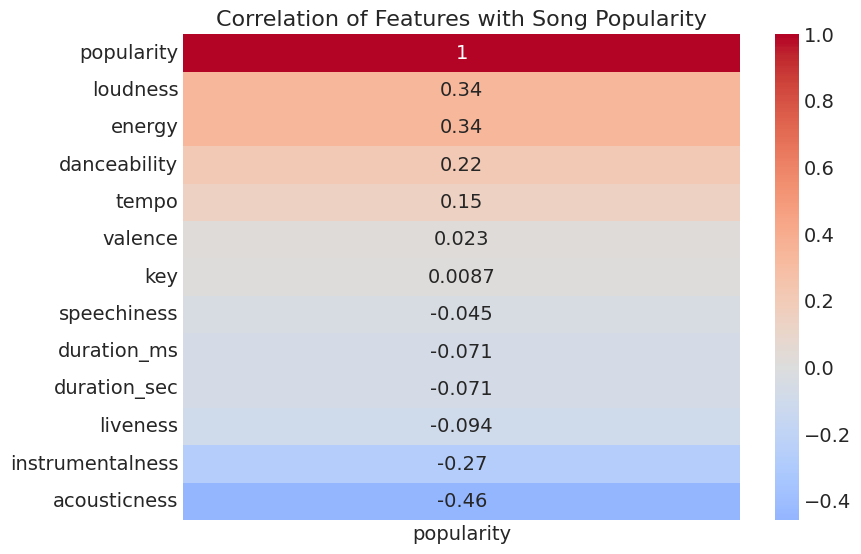

In [14]:
# Compute correlations with popularity
pop_corr = df.corr(numeric_only=True)[['popularity']].sort_values(by='popularity', ascending=False)

# Visualize correlations as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pop_corr, annot=True, cmap='coolwarm', center=0, cbar=True)
plt.title('Correlation of Features with Song Popularity', fontsize=16)
plt.show()


The correlation of each feature with popularity shows which factors are most associated with a song’s popularity.
Positive correlations:
Loudness (0.36): Louder songs tend to be more popular.
Energy (0.34): Songs with higher energy levels are generally more popular.
Danceability (0.22): More danceable songs slightly tend to be more popular.
Negative correlations:
Acousticness (-0.46): Songs that are very acoustic tend to be less popular.
Instrumentalness (-0.27): Songs with more instrumental content tend to be less popular.
Interpretation:
Popularity appears to be driven mostly by acousticness (negatively) and loudness (positively), meaning loud, energetic songs that are less acoustic tend to attract more listeners

Q2:Which genre is the most popular and which is the least?

/tmp/ipython-input-1866465784.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')


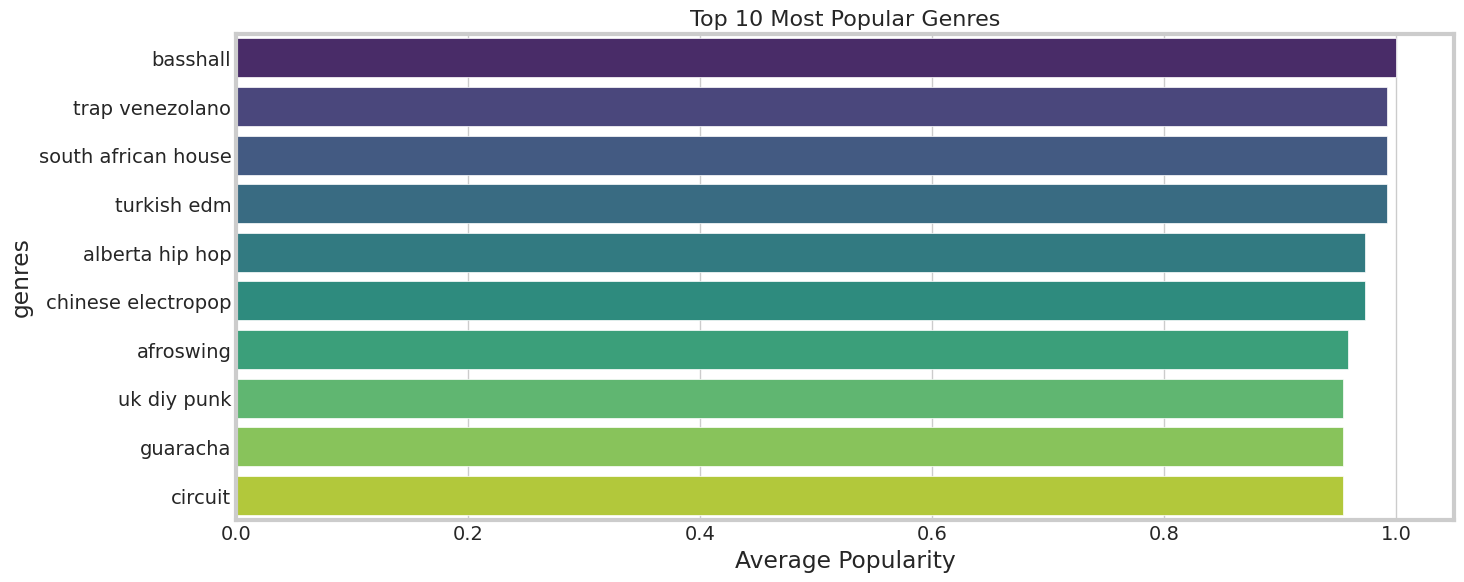

/tmp/ipython-input-1866465784.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10.values, y=bottom_10.index , palette='magma')


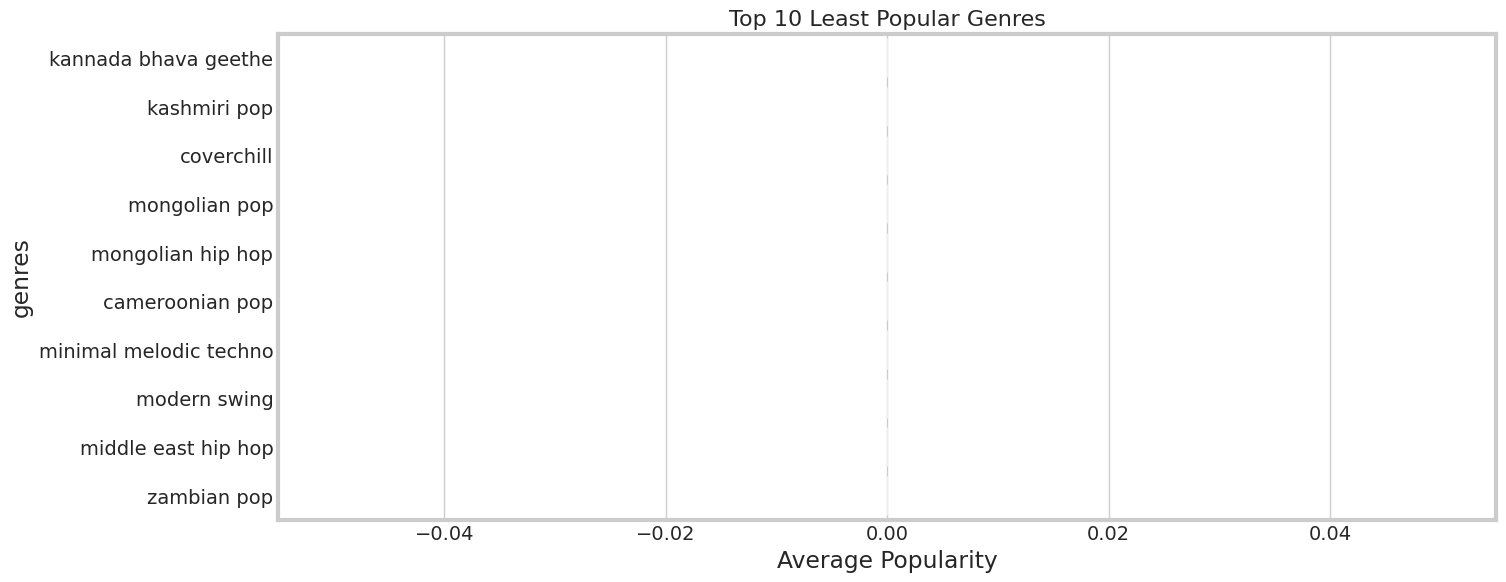

/tmp/ipython-input-1866465784.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_non_zero.values, y=bottom_10_non_zero.index, palette='magma')


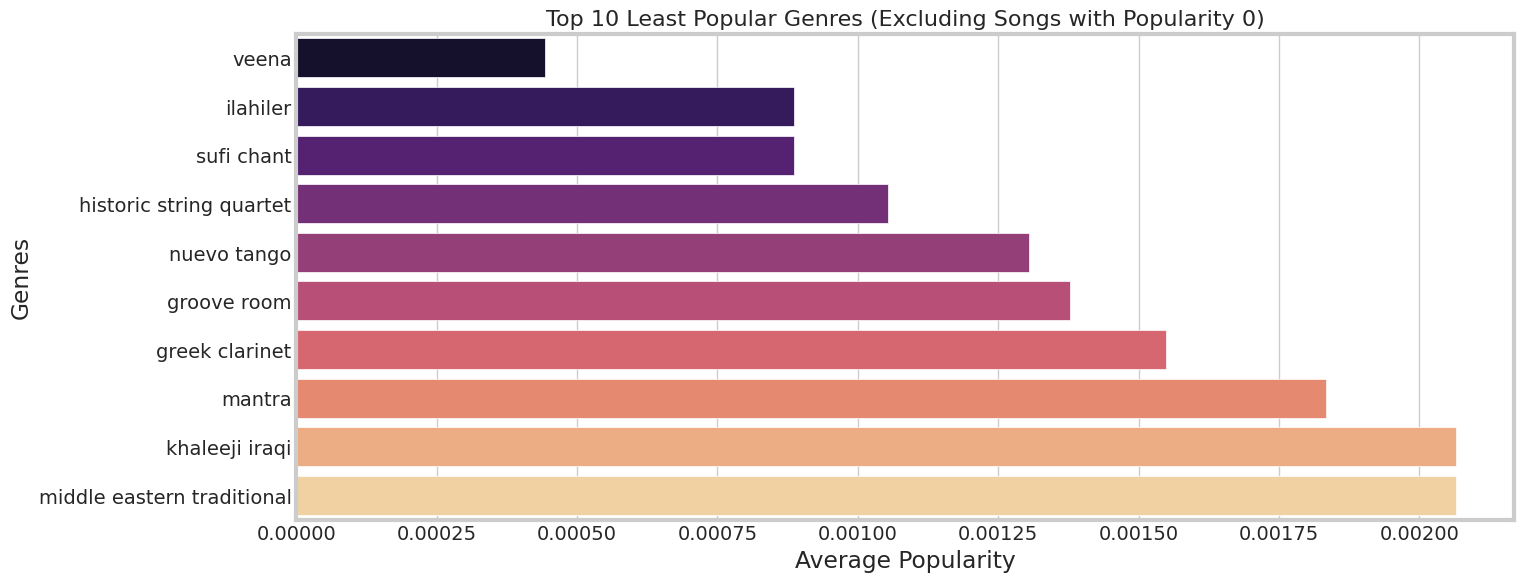

In [15]:
# Group by genre and compute mean popularity
genre_popularity = df.groupby('genres')['popularity'].mean().sort_values(ascending=False)

# Select top 10 and bottom 10 genres
top_10 = genre_popularity.head(10)
bottom_10 = genre_popularity.tail(10)

# Visualization
plt.figure(figsize=(14,6))
sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')
plt.title('Top 10 Most Popular Genres', fontsize=16)
plt.xlabel('Average Popularity')
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(x=bottom_10.values, y=bottom_10.index , palette='magma')
plt.title('Top 10 Least Popular Genres', fontsize=16)
plt.xlabel('Average Popularity')
plt.show()

# Filter out songs with popularity == 0
df_non_zero = df[df['popularity'] != 0]

# Group by genre and compute mean popularity
genre_popularity_non_zero = df_non_zero.groupby('genres')['popularity'].mean()

# Select the 10 least popular genres
bottom_10_non_zero = genre_popularity_non_zero.nsmallest(10)

# Visualization
plt.figure(figsize=(14,6))
sns.barplot(x=bottom_10_non_zero.values, y=bottom_10_non_zero.index, palette='magma')
plt.title('Top 10 Least Popular Genres (Excluding Songs with Popularity 0)', fontsize=16)
plt.xlabel('Average Popularity')
plt.ylabel('Genres')
plt.show()


We calculated the average popularity for each genre to determine which music genres are the most and least popular. The bar plots allow us to visualize these differences easily. Based on our analysis: the most popular genres are Basshall, Trap Venezolano, South African House, Turkish EDM, Alberta Hip Hop, Chinese Electropop, Afroswing, UK Div Punk, Quaracha, and Circuit, while the least popular genres are Kannada Bhava Geethe, Kashmiri Pop, Coverchill, Mongolian Pop, Mongolian Hip Hop, Cameroonian Pop, Minimal Melodic Techno, Modern Swing, Middle East Hip Hop, and Zambian Pop. We wrote this code to rank the genres by popularity and generate visualizations so we can clearly see which genres attract more listeners and which attract fewer, making it easier to interpret trends in music popularity. also we added the 10 non zero least popular ones.

Q3:What are the most correlated pairs of attributes? (Mention 2 pairs, with interpretation)

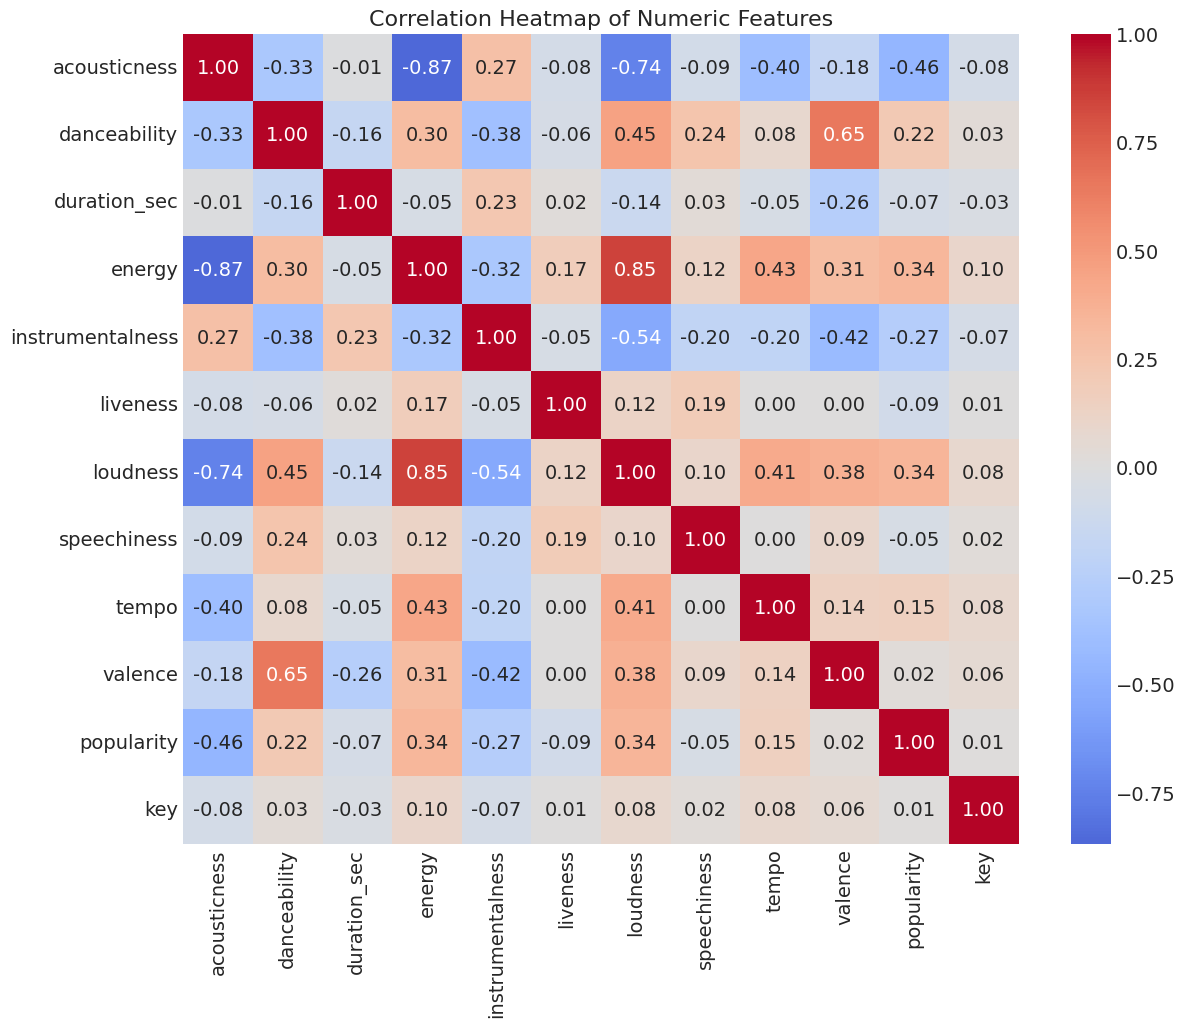

In [16]:
# Calculate the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()


The heatmap shows how different music features relate to each other. The strongest positive correlation is between energy and loudness (0.86), meaning energetic songs tend to be louder. The strongest negative correlation is between acousticness and energy (-0.87), showing that acoustic songs are usually less energetic. These relationships help explain how musical traits often appear together or oppose each other.

Q4:Plot the frequency of words in genres. Which main genre categories have the most sub-genres? (mention at least 3)

/tmp/ipython-input-3831912719.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette='viridis')


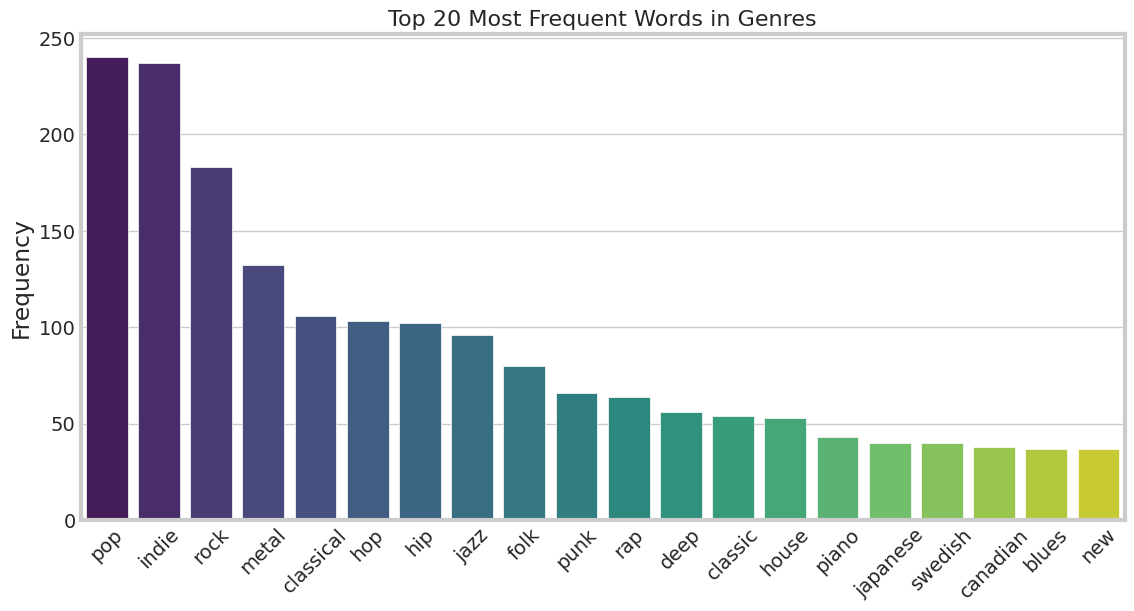

In [17]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Split all genre names into words and count frequency
genre_words = " ".join(df['genres']).lower().split()
word_freq = Counter(genre_words)

# Select the top 20 most common words for visualization
top_words = dict(word_freq.most_common(20))

# Plot using a bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Genres", fontsize=16)
plt.ylabel("Frequency")
plt.show()

The bar chart displays the most common words found in genre names. It shows that "pop," "indie," and "rock" appear most frequently, suggesting these are major genre categories with many sub-genres like indie rock, synth-pop, and punk rock. This helps identify which genres are most diverse and widely represented in the dataset.

Q5:Create an additional visualization that differs from earlier ones. Your visualization must highlight a new data relationship or finding. Provide a short explanation of the insight and its relevance.


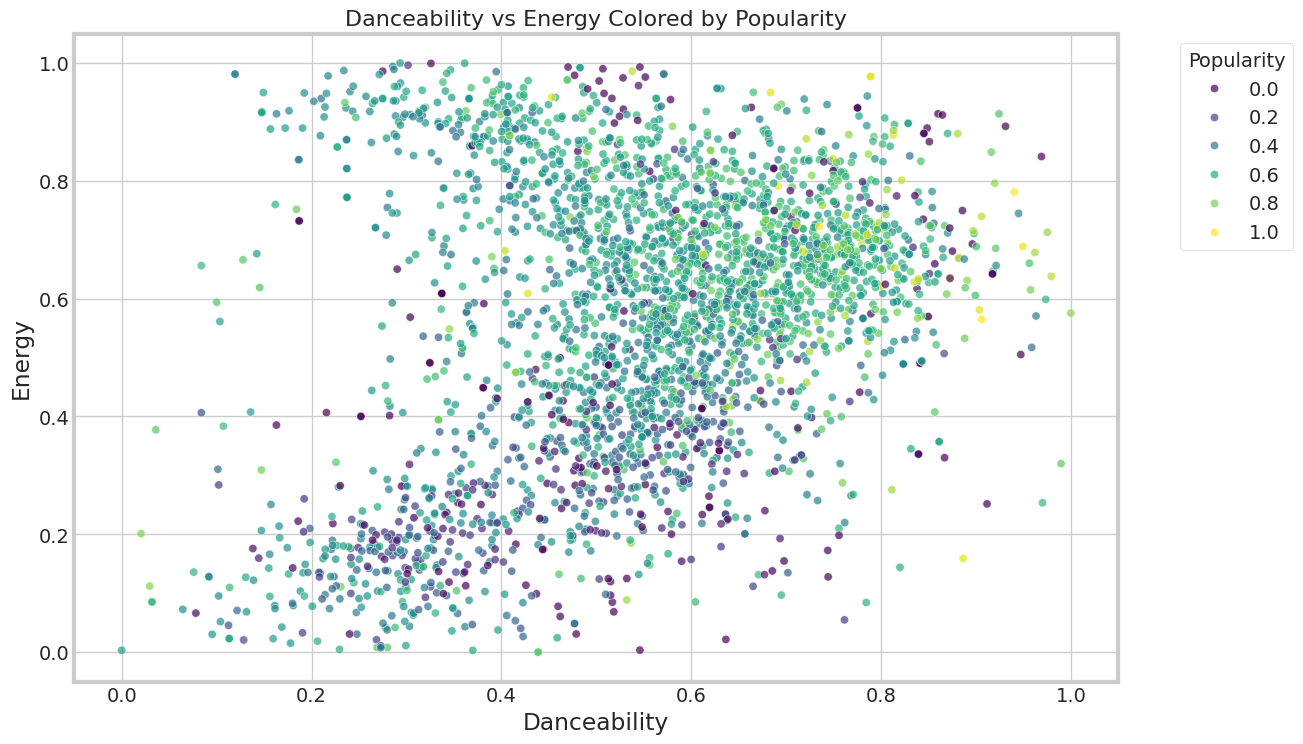

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='danceability',
    y='energy',
    hue='popularity',       # color by popularity
    palette='viridis',
    data=df,
    alpha=0.7
)
plt.title("Danceability vs Energy Colored by Popularity", fontsize=16)
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.legend(title='Popularity', bbox_to_anchor=(1.05, 1), loc='upper left')  # optional: move legend outside
plt.show()


The scatterplot shows how danceability relates to energy, with colors adding another dimension of variation. It highlights that songs with higher danceability usually also have higher energy, and the color shading points to clusters or patterns in the data. This provides a new perspective by showing how multiple features interact together, beyond just pairwise correlations.

Data Preparation for Modelling



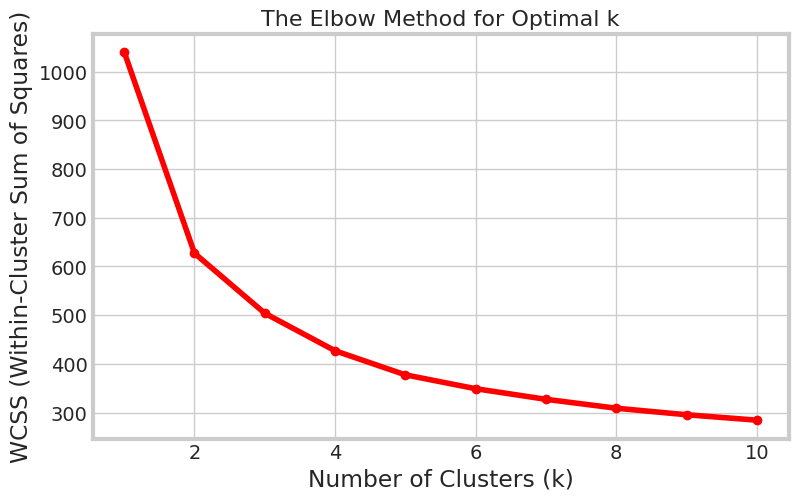

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We try out different number of clusters incrementally
# From 1 to 10
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(X)  # Use your normalized musical features
    wcss.append(km.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [20]:
from sklearn.cluster import KMeans

# Apply K-Means clustering with the chosen number of clusters
km = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
km.fit(X)  # X is your musical features dataframe

# Get the cluster labels for the fitted data
labels = km.labels_
labels


array([1, 1, 3, ..., 0, 2, 0], dtype=int32)

This code applies the K-Means algorithm to group songs with similar musical features into clusters. The labels show which cluster each song belongs to, allowing us to analyze and compare groups of similar genres.

In [21]:
# Assign the cluster labels from K-Means to a new column called 'cluster' in your dataframe
df['cluster'] = labels

# Optional: Prevent pandas from truncating output so you can see all columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Display descriptive statistics for each cluster
df.groupby('cluster').describe()


acousticness                                                    \
               count      mean       std       min       25%       50%   
cluster                                                                  
0              955.0  0.251396  0.139077  0.000215  0.147132  0.239140   
1              395.0  0.871730  0.136390  0.080986  0.811411  0.920332   
2              726.0  0.700451  0.161348  0.325299  0.569879  0.693026   
3              290.0  0.163577  0.170356  0.000002  0.009064  0.112168   
4              606.0  0.093465  0.095900  0.000000  0.016625  0.067437   

                            danceability                                \
              75%       max        count      mean       std       min   
cluster                                                                  
0        0.347702  0.683734        955.0  0.691728  0.105873  0.406026   
1        0.969743  1.000000        395.0  0.325424  0.129013  0.000000   
2        0.825080  0.998394        726.0  0.550731  0.114404  0.102167   
3        0.271007  0.765060        290.0  0.548527  0.190813  0.099967   
4        0.137637  0.602409        606.0  0.476431  0.122372  0.119367   

                                                duration_ms                 \
              25%       50%       75%       max       count           mean   
cluster                                                                      
0        0.611262  0.696843  0.766021  1.000000       955.0  240090.653414   
1        0.248454  0.313670  0.396292  0.755762       395.0  287691.151567   
2        0.489669  0.552781  0.615772  0.970187       726.0  234096.816694   
3        0.414679  0.562916  0.676082  0.963307       290.0  292942.293802   
4        0.400304  0.481641  0.556713  0.785002       606.0  248021.595425   

                                                                               \
                   std       min            25%            50%            75%   
cluster                                                                         
0         51408.183813   30946.0  210274.662595  234658.494505  260940.115927   
1        155811.182694   72187.0  206312.075697  262395.045600  342844.294421   
2        113164.241411   45004.0  185842.666573  216322.468740  254201.170360   
3         81102.086210  115177.0  242219.021966  288347.000000  342304.650000   
4         57351.001883   91233.0  217347.001283  240678.637194  272155.146279   

                      energy                                          \
                  max  count      mean       std       min       25%   
cluster                                                                
0        5.629600e+05  955.0  0.661615  0.097841  0.320026  0.592710   
1        2.382587e+06  395.0  0.189484  0.112761  0.000000  0.111548   
2        1.622000e+06  726.0  0.394021  0.127629  0.021535  0.313319   
3        6.249330e+05  290.0  0.697632  0.161769  0.251592  0.580198   
4        7.163470e+05  606.0  0.792797  0.125874  0.277758  0.717173   

                                      instrumentalness                      \
              50%       75%       max            count      mean       std   
cluster                                                                      
0        0.657097  0.719907  0.956558            955.0  0.054445  0.083347   
1        0.177121  0.241179  0.751525            395.0  0.625236  0.239171   
2        0.398511  0.474104  0.904730            726.0  0.122772  0.154308   
3        0.705150  0.820929  0.993291            290.0  0.625215  0.174325   
4        0.810800  0.891439  1.000000            606.0  0.105356  0.109690   

                                                          liveness            \
              min       25%       50%       75%       max    count      mean   
cluster                                                                        
0        0.000000  0.000512  0.017385  0.073034  0.489247    955.0  0.171709   
1        0.000003  0.48325

This code assigns the cluster labels generated by K-Means to a new column in the dataframe so we can identify which cluster each song belongs to. By using groupby('cluster').describe(), we get summary statistics for all features within each cluster, allowing us to compare and interpret the characteristics of each group of similar music genres.

In [22]:
# Display descriptive statistics for categorical columns (if any) grouped by cluster
df.groupby('cluster').describe(include='object')


genres                          
         count unique           top freq
cluster                                 
0          955    955        zydeco    1
1          395    395          yoik    1
2          726    726  zurich indie    1
3          290    290         wonky    1
4          606    606         zeuhl    1

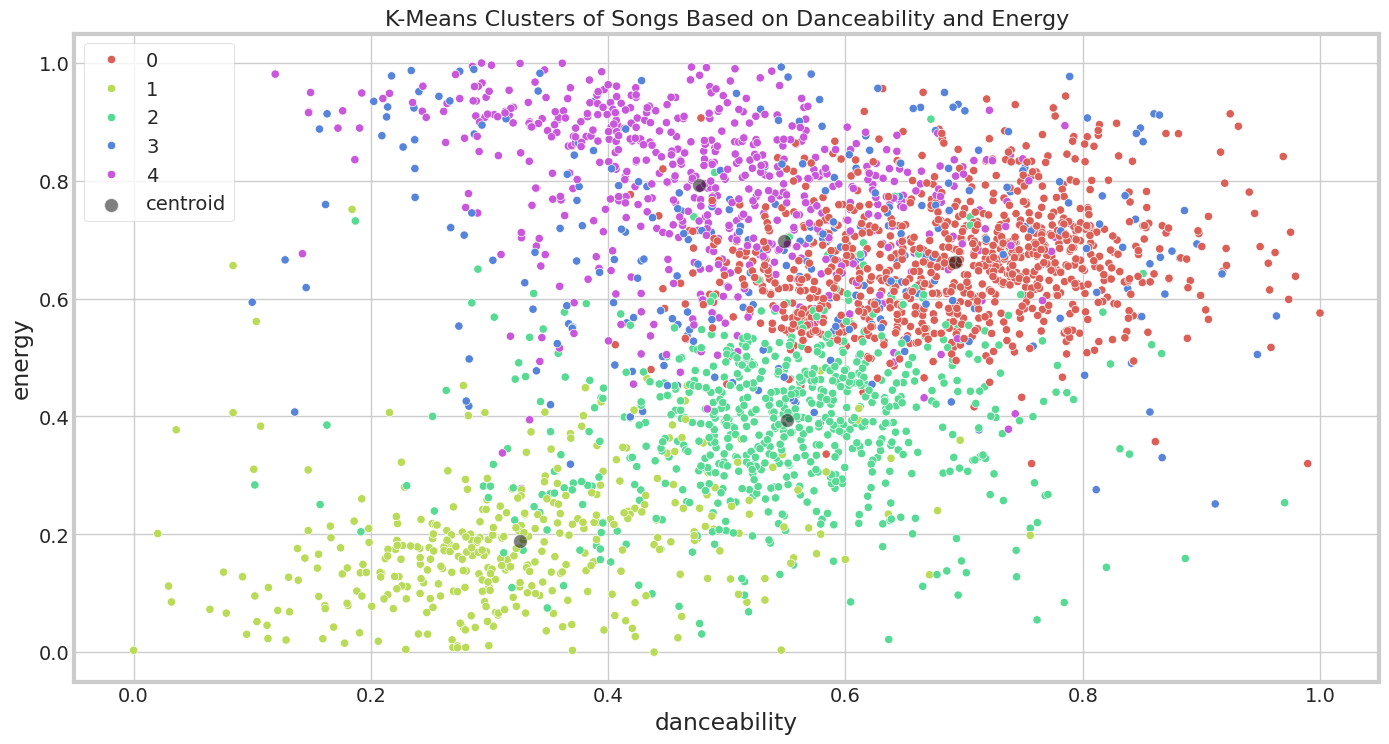

In [23]:
# Visualize clusters using two selected musical features
plt.figure(figsize=(15,8))
sns.scatterplot(x='danceability', y='energy', hue='cluster', data=df, palette=sns.color_palette('hls', 5))

# Add the cluster centroids to the plot
centroids = km.cluster_centers_
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], label='centroid', color='black', alpha=0.5, s=100)

plt.title('K-Means Clusters of Songs Based on Danceability and Energy', fontsize=16)
plt.show()


answer this elect and justify the appropriate parameter values for the clustering algorithm, while clearly explaining the method used to find these values. here

In [31]:
# Display 5 random genres from each cluster
for c in df['cluster_label'].unique():
    print("="*30)
    print(f"Cluster: {c}")
    print("="*30)
    sample_genres = df[df['cluster_label'] == c]['genres'].sample(5, random_state=42).values
    for g in sample_genres:
        print(g)
    print("\n")

Cluster: Danceable Hits
caucasian classical piano
tzadik
korean classical piano
brass quintet
wisconsin indie


Cluster: Instrumental Focus
dutch trance
swedish eurodance
classic j-rock
lo-fi vgm
instrumental post-rock


Cluster: Acoustic/Soft
irish ballad
pakistani pop
ryukyu ongaku
bajki
romanian rock


Cluster: High Energy
colombian rock
indie pop rap
puerto rican pop
rumba congolaise
guadalajara indie


Cluster: Mixed Energy
uk diy punk
italian power metal
british alternative rock
british indie rock
dutch prog




answer this 2. Display a random sample of at least 5 genres from each cluster group.
 here

/tmp/ipython-input-2260761869.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_means.columns, y=cluster_means.loc[cluster].values, palette='viridis')


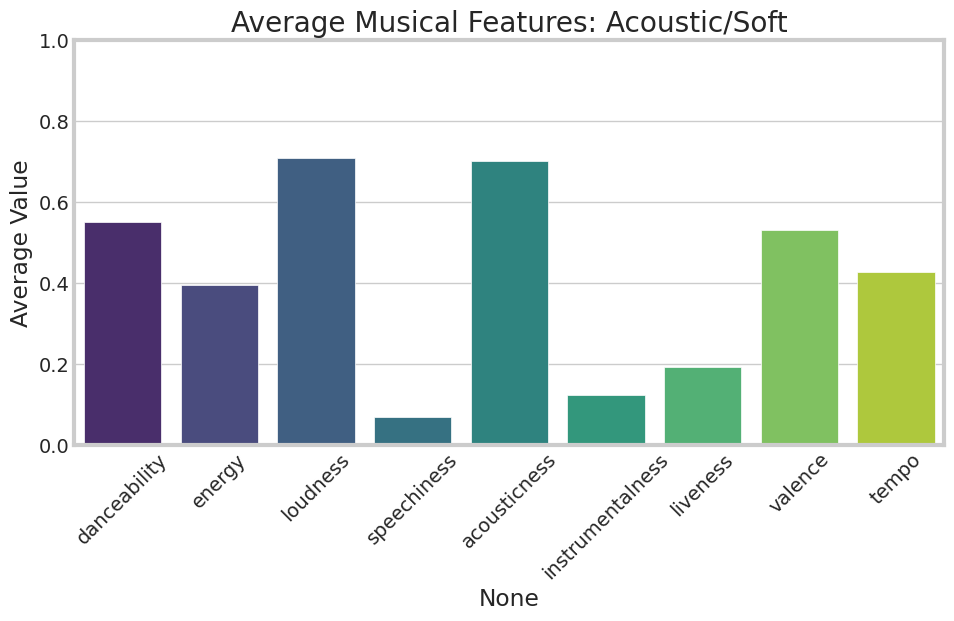

/tmp/ipython-input-2260761869.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_means.columns, y=cluster_means.loc[cluster].values, palette='viridis')


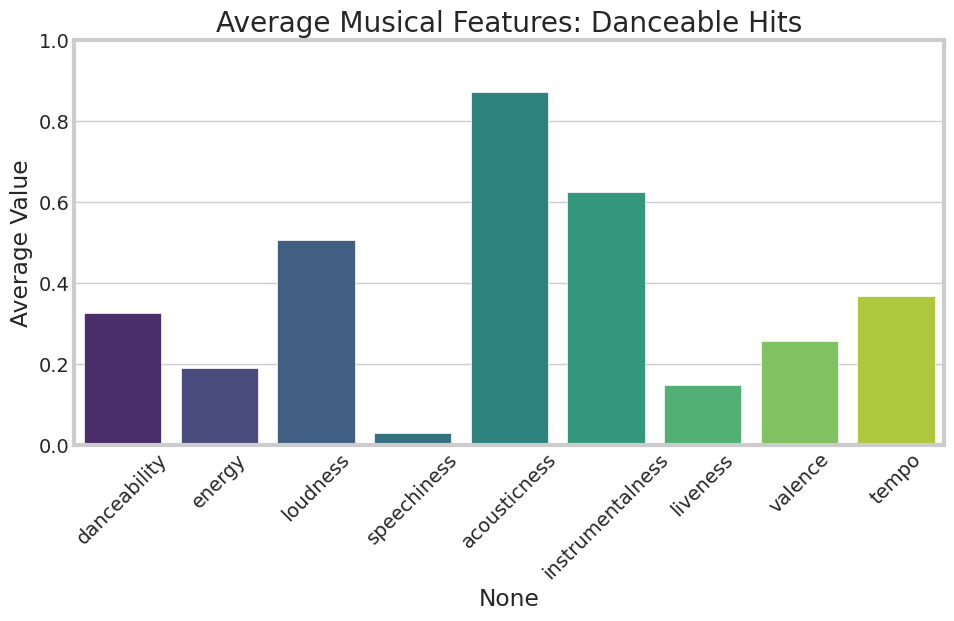

/tmp/ipython-input-2260761869.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_means.columns, y=cluster_means.loc[cluster].values, palette='viridis')


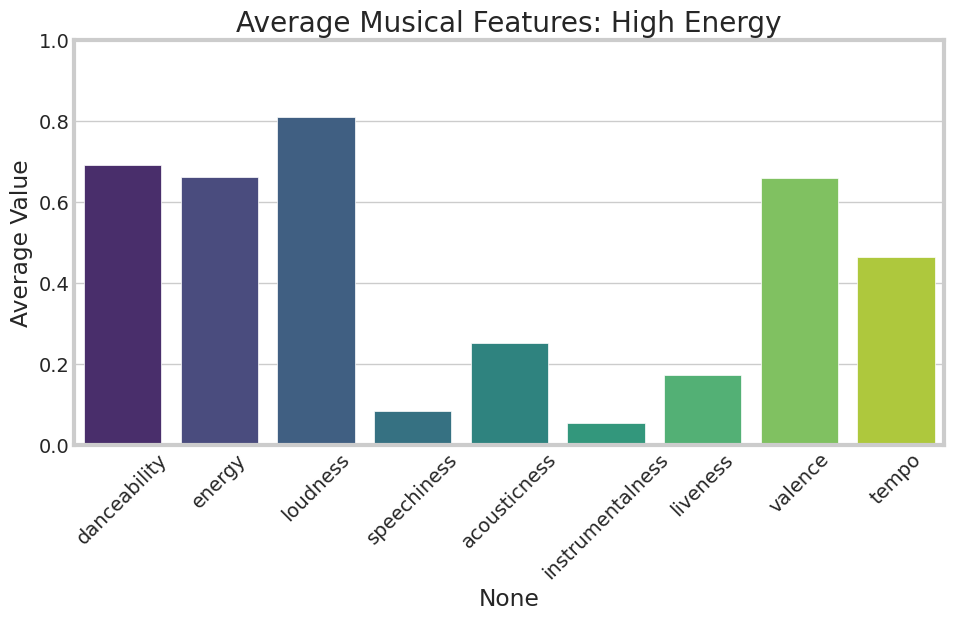

/tmp/ipython-input-2260761869.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_means.columns, y=cluster_means.loc[cluster].values, palette='viridis')


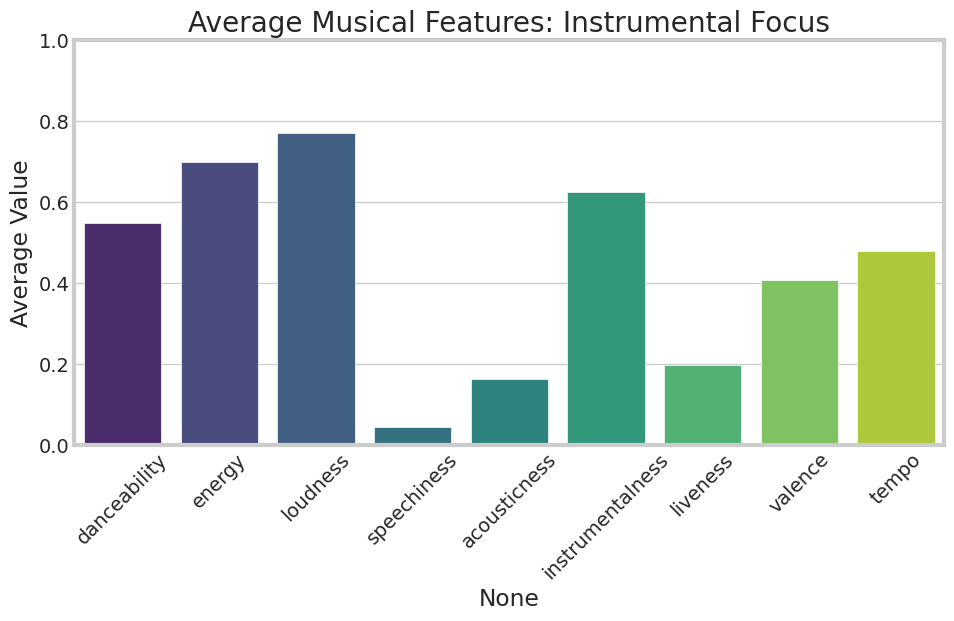

/tmp/ipython-input-2260761869.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_means.columns, y=cluster_means.loc[cluster].values, palette='viridis')


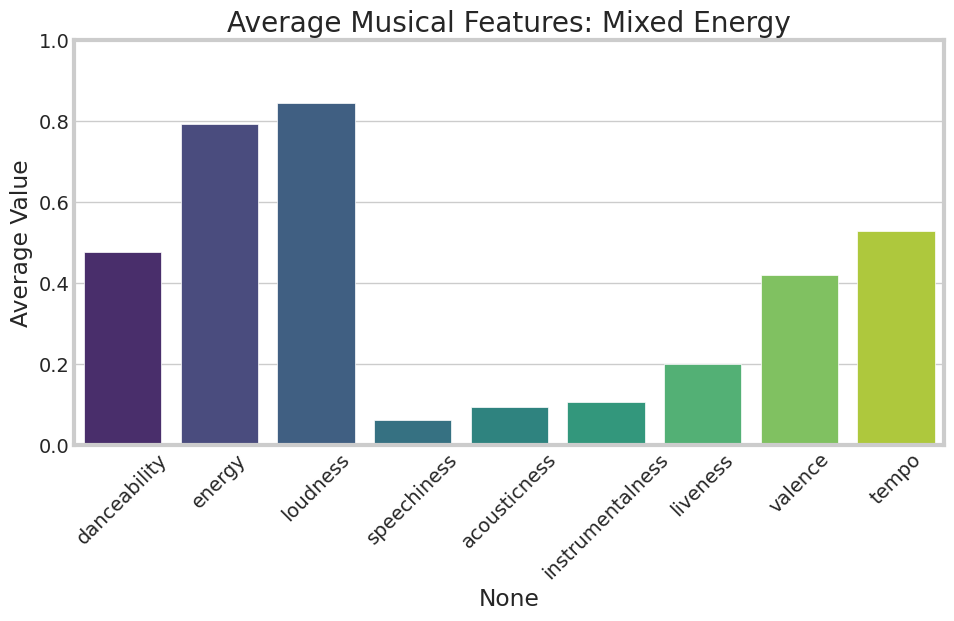

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the 5 clusters
cluster_features = df[df['cluster'].isin([
    'High Energy', 'Danceable Hits', 'Acoustic/Soft', 'Instrumental Focus', 'Mixed Energy'
])]

features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Compute mean feature values per cluster
cluster_means = cluster_features.groupby('cluster')[features].mean()

# Plot each cluster separately
for cluster in cluster_means.index:
    plt.figure(figsize=(10,5))
    sns.barplot(x=cluster_means.columns, y=cluster_means.loc[cluster].values, palette='viridis')
    plt.title(f'Average Musical Features: {cluster}')
    plt.ylabel('Average Value')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # Optional: to make comparisons easier
    plt.show()



do this here 3. Visualize and interpret/describe each cluster with respect to the features present in the data.

the lecture one


In [26]:
# Map each song to its cluster label (the 5 new genres)
df['cluster_label'] = df['cluster']  # assuming you already renamed clusters to the 5 genre groups

# Function to recommend similar genres within the same cluster
def genre_recommender_simple(genre_input, df=df):
    if genre_input not in df['cluster_label'].unique():
        return f"Genre not found. Available clusters: {df['cluster_label'].unique()}"

    cluster = df[df['cluster_label'] == genre_input]['cluster_label'].iloc[0]
    # Get all genres in the same cluster excluding the input
    similar_genres = df[df['cluster_label'] == cluster]['genres'].unique()
    similar_genres = [g for g in similar_genres if g != genre_input]
    return similar_genres[:5]  # return top 5


the bonus one

In [27]:
genre_recommender_simple('Danceable Hits')


['21st century classical',
 '432hz',
 'acousmatic',
 'african-american classical',
 'ambient']

test for the bonus